Equation 1, finding y_i+1 directly from solving the algebraic equation, didn't need to use a root finding equation as it was simple

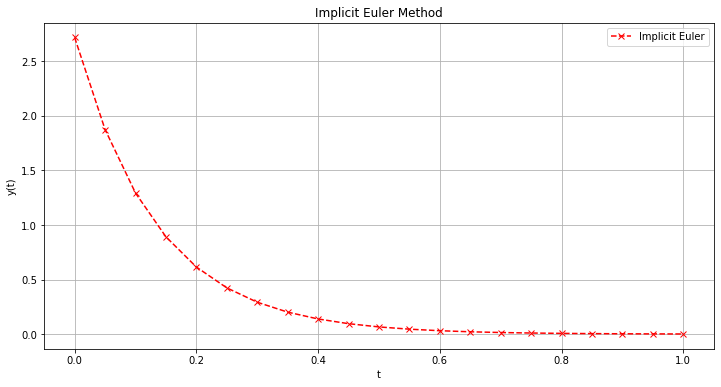

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Implicit Euler method
def implicit_euler(h, t_final):
    num_steps = int(t_final / h)
    t_values = np.linspace(0, t_final, num_steps + 1)
    y_values = np.zeros(num_steps + 1)
    y_values[0] = np.exp(1)  # Initial condition

    for i in range(num_steps):
        y_values[i + 1] = y_values[i] / (1 + 9 * h)

    return t_values, y_values

# Parameters
h = 0.05
t_final =1.0

# Compute solutions
t_values, y_implicit = implicit_euler(h, t_final)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(t_values, y_implicit, label='Implicit Euler', linestyle='--', marker='x', color='red')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.grid(True)
plt.title('Implicit Euler Method')
plt.show()


Equation 2 using scipy.optimize.root for root finding


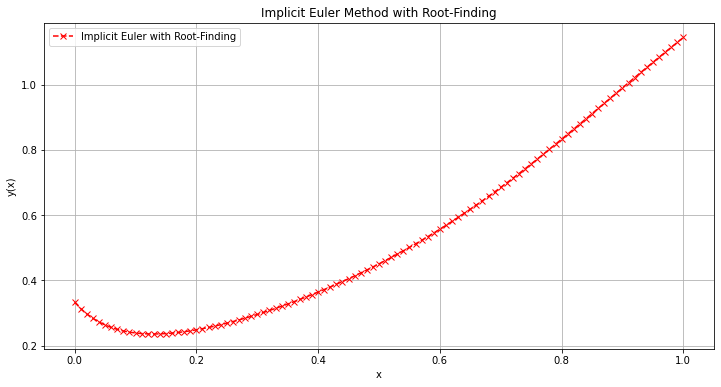

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root

# Implicit Euler method with root-finding
def implicit_euler_root(h, x_final):
    num_steps = int(x_final / h)
    x_values = np.linspace(0, x_final, num_steps + 1)
    y_values = np.zeros(num_steps + 1)
    y_values[0] = 1/3  # Initial condition

    for i in range(num_steps):
        # Define the function for which we want to find the root
        f = lambda y_next: y_next - y_values[i] - h * (-20 * (y_next - x_values[i])**2 + 2 * x_values[i])
        # Use the root function to find the root
        y_values[i + 1] = root(f, y_values[i]).x

    return x_values, y_values

# Parameters
h = 0.01
x_final = 1.0

# Compute solutions
x_values, y_implicit_root = implicit_euler_root(h, x_final)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(x_values, y_implicit_root, label='Implicit Euler with Root-Finding', linestyle='--', marker='x', color='red')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.legend()
plt.grid(True)
plt.title('Implicit Euler Method with Root-Finding')
plt.show()


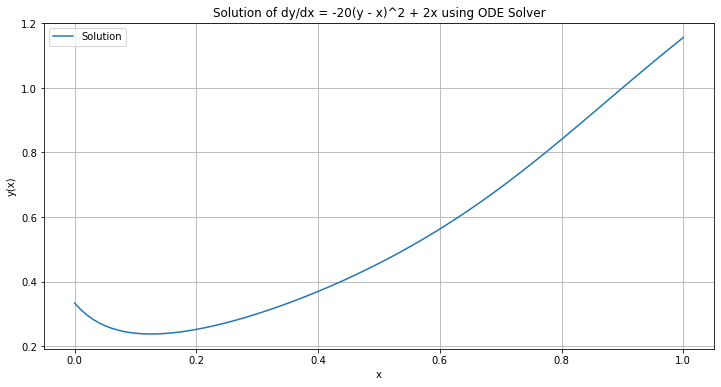

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the differential equation
def dy_dx(x, y):
    return -20 * (y - x)**2 + 2 * x

# Parameters
x_span = (0, 1)
y_init = [1/3]

# Solve the differential equation
solution = solve_ivp(dy_dx, x_span, y_init, method='Radau', dense_output=True)

# Plot the solution
x_values = np.linspace(0, 1, 100)
y_values = solution.sol(x_values)
plt.figure(figsize=(12, 6))
plt.plot(x_values, y_values[0], label='Solution')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.legend()
plt.grid(True)
plt.title('Solution of dy/dx = -20(y - x)^2 + 2x using ODE Solver')
plt.show()
